In [1]:
!nvidia-smi



Tue May  6 20:19:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [4]:
!unzip /content/football-field-detection.v15i.yolov8.zip

Archive:  /content/football-field-detection.v15i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/08fd33_2_9_png.rf.06a81a8c5fe59020e0dc901cd52af0f7.jpg  
 extracting: test/images/08fd33_4_11_png.rf.a86033b16a4d8663acde0eb2610de32b.jpg  
 extracting: test/images/08fd33_4_3_png.rf.637895c1f0150961655ab7adb5ada0a9.jpg  
 extracting: test/images/08fd33_9_2_png.rf.1e4e73f40f1b7cc15fde22af84fb22e4.jpg  
 extracting: test/images/0a2d9b_2_2_png.rf.f8620cfe8bcf591047c33460e65ffd96.jpg  
 extracting: test/images/121364_3_1_png.rf.ddde85f0cbd1fbf16aa1336bbb8c3dfc.jpg  
 extracting: test/images/121364_3_7_png.rf.94ce64904559a871c7b28c995b425022.jpg  
 extracting: test/images/121364_3_9_png.rf.4b5edf10a61306103b19ccd865c8d4bb.jpg  
 extracting: test/images/2e57b9_1_3_png.rf.6cad8947bf69f6d102606b1183e1704a.jpg  
 extracting: test/images/2e57b9_2_6_png.rf

In [5]:
import os
DATASET_DIR = "/content/"
print("Dataset directory:", DATASET_DIR)

# Set environment variable to avoid memory fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# !pip install -q ultralytics

Dataset directory: /content/


In [6]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [7]:
import os
import glob

# Define splits
splits = ['train', 'valid', 'test']
dataset_yaml_path = os.path.join(DATASET_DIR, 'data.yaml')

# Verify data.yaml exists
if not os.path.exists(dataset_yaml_path):
    print(f"Error: {dataset_yaml_path} does not exist.")
else:
    print(f"Found data.yaml at: {dataset_yaml_path}")
    # Print data.yaml contents for debugging
    with open(dataset_yaml_path, 'r') as f:
        print("data.yaml contents:\n", f.read())

# Verify images and labels for each split
for split in splits:
    images_dir = os.path.join(DATASET_DIR, split, 'images')
    labels_dir = os.path.join(DATASET_DIR, split, 'labels')

    # Check images
    if os.path.exists(images_dir):
        image_files = glob.glob(os.path.join(images_dir, '*.jpg')) + glob.glob(os.path.join(images_dir, '*.png'))
        print(f"Found {len(image_files)} images in {images_dir}")
    else:
        print(f"Error: {images_dir} does not exist.")

    # Check labels
    if os.path.exists(labels_dir):
        label_files = glob.glob(os.path.join(labels_dir, '*.txt'))
        print(f"Found {len(label_files)} label files in {labels_dir}")
    else:
        print(f"Error: {labels_dir} does not exist.")

Found data.yaml at: /content/data.yaml
data.yaml contents:
 train: ../train/images
val: ../valid/images
test: ../test/images

kpt_shape: [32, 3]
flip_idx: [24, 25, 26, 27, 28, 29, 22, 23, 21, 17, 18, 19, 20, 13, 14, 15, 16, 9, 10, 11, 12, 8, 6, 7, 0, 1, 2, 3, 4, 5, 31, 30]

nc: 1
names: ['pitch']

roboflow:
  workspace: roboflow-jvuqo
  project: football-field-detection-f07vi
  version: 15
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi/dataset/15
Found 255 images in /content/train/images
Found 255 label files in /content/train/labels
Found 34 images in /content/valid/images
Found 34 label files in /content/valid/labels
Found 28 images in /content/test/images
Found 28 label files in /content/test/labels



Train Split:
Images: 255
Total visible keypoints: 3881
Average visible keypoints per image: 15.22
Visibility flag distribution: {0: 4279, 1: 2, 2: 3879, 'invalid': 0}

Valid Split:
Images: 34
Total visible keypoints: 497
Average visible keypoints per image: 14.62
Visibility flag distribution: {0: 591, 1: 0, 2: 497, 'invalid': 0}

Test Split:
Images: 28
Total visible keypoints: 426
Average visible keypoints per image: 15.21
Visibility flag distribution: {0: 470, 1: 0, 2: 426, 'invalid': 0}


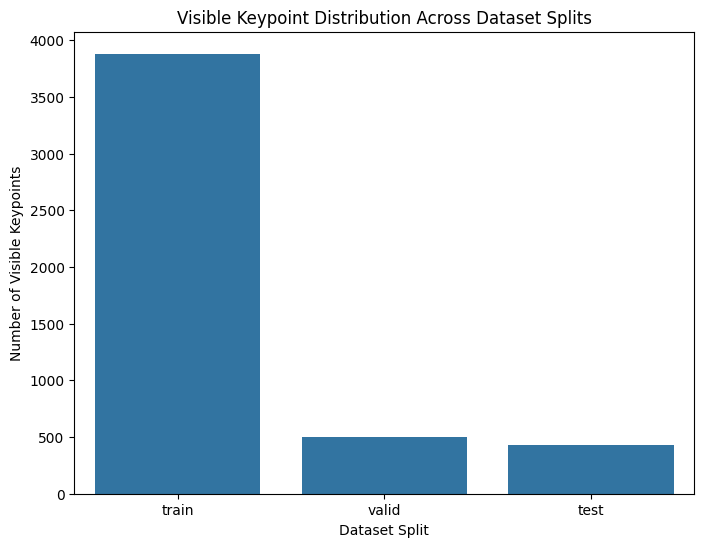

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

class_names = ['pitch']
num_keypoints = 32

keypoint_counts = {'split': [], 'visible_keypoint_count': []}
for split in splits:
    labels_dir = os.path.normpath(os.path.join(DATASET_DIR, split, 'labels'))
    if not os.path.exists(labels_dir):
        print(f"Warning: {labels_dir} does not exist.")
        continue

    total_visible_keypoints = 0
    num_images = 0
    vis_flag_counts = {0: 0, 1: 0, 2: 0, 'invalid': 0}  # Track visibility flags
    for txt_file in glob.glob(os.path.join(labels_dir, '*.txt')):
        with open(txt_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) < 5:
                    print(f"Error: Invalid label format in {txt_file}, too few values.")
                    continue
                class_id = int(parts[0])
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {txt_file}, skipping.")
                    continue
                kpts = parts[5:]
                if len(kpts) != num_keypoints * 3:
                    print(f"Warning: Expected {num_keypoints * 3} keypoint values, got {len(kpts)} in {txt_file}")
                    continue
                try:
                    kpts = [float(x) for x in kpts]
                    visible_count = 0
                    for i in range(2, len(kpts), 3):
                        vis = kpts[i]
                        # Update visibility flag counts
                        if vis in [0, 1, 2]:
                            vis_flag_counts[vis] += 1
                        else:
                            vis_flag_counts['invalid'] += 1
                            print(f"Warning: Invalid visibility flag {vis} in {txt_file}")
                        # Count visible keypoints (vis >= 1)
                        if vis >= 1:
                            x, y = kpts[i-2], kpts[i-1]
                            # Validate coordinates
                            if not (0 <= x <= 1 and 0 <= y <= 1):
                                print(f"Warning: Out-of-bounds keypoint coordinates (x={x}, y={y}) in {txt_file}")
                            else:
                                visible_count += 1
                    total_visible_keypoints += visible_count
                except ValueError:
                    print(f"Error: Non-numeric values in keypoint data in {txt_file}")
                    continue
            num_images += 1

    keypoint_counts['split'].append(split)
    keypoint_counts['visible_keypoint_count'].append(total_visible_keypoints)

    print(f"\n{split.capitalize()} Split:")
    print(f"Images: {num_images}")
    print(f"Total visible keypoints: {total_visible_keypoints}")
    print(f"Average visible keypoints per image: {total_visible_keypoints / num_images if num_images > 0 else 0:.2f}")
    print(f"Visibility flag distribution: {vis_flag_counts}")

counts_df = pd.DataFrame(keypoint_counts)

plt.figure(figsize=(8, 6))
sns.barplot(data=counts_df, x='split', y='visible_keypoint_count')
plt.title('Visible Keypoint Distribution Across Dataset Splits')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Visible Keypoints')
# Use log scale if counts vary widely
if max(counts_df['visible_keypoint_count'], default=0) > 10 * min(counts_df['visible_keypoint_count'] + [1]):
    plt.yscale('log')
    plt.ylabel('Number of Visible Keypoints (Log Scale)')
plt.savefig(os.path.join(DATASET_DIR, 'visible_keypoint_distribution.png'))
plt.show()

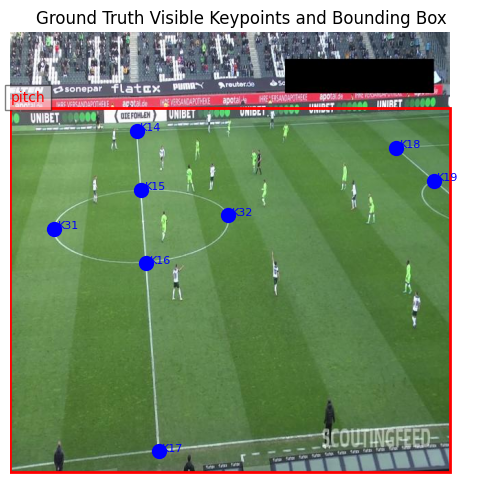

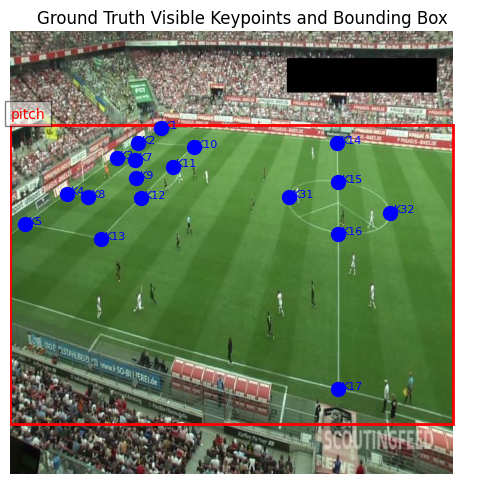

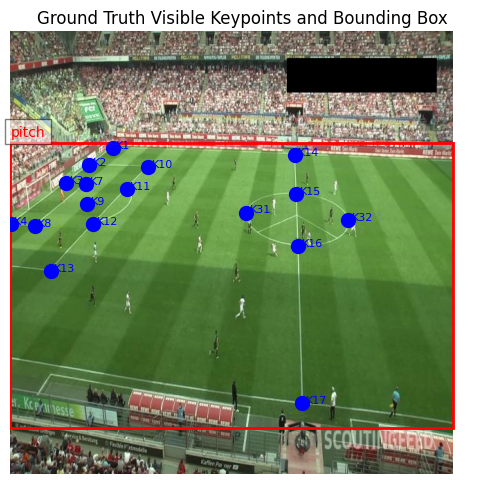

In [9]:
from PIL import Image as PILImage
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

train_images = glob.glob(os.path.join(DATASET_DIR, 'train', 'images', '*.jpg')) + glob.glob(os.path.join(DATASET_DIR, 'train', 'images', '*.png'))
colors = ['red']

if train_images:
    sample_images = random.sample(train_images, min(3, len(train_images)))

    for img_path in sample_images:
        img = np.array(PILImage.open(img_path))
        img_height, img_width = img.shape[:2]

        label_file = os.path.join(DATASET_DIR, 'train', 'labels', os.path.splitext(os.path.basename(img_path))[0] + '.txt')
        if not os.path.exists(label_file):
            print(f"Warning: Label file {label_file} not found, skipping.")
            continue

        bboxes = []
        keypoints = []
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {label_file}, skipping.")
                    continue
                center_x, center_y, box_width, box_height = map(float, parts[1:5])
                bboxes.append([center_x, center_y, box_width, box_height])
                kpts = [float(x) for x in parts[5:]]
                if len(kpts) != num_keypoints * 3:
                    print(f"Warning: Expected {num_keypoints * 3} keypoint values, got {len(kpts)} in {label_file}")
                    continue
                kpts = [(kpts[i], kpts[i+1], kpts[i+2]) for i in range(0, len(kpts), 3)]
                keypoints.append(kpts)

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(img)

        for bbox, kpts in zip(bboxes, keypoints):
            center_x, center_y, box_width, box_height = bbox
            xmin = (center_x - box_width / 2) * img_width
            xmax = (center_x + box_width / 2) * img_width
            ymin = (center_y - box_height / 2) * img_height
            ymax = (center_y + box_height / 2) * img_height

            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor=colors[0], facecolor='none', linewidth=2)
            ax.add_patch(rect)
            ax.text(xmin, ymin - 10, class_names[0], color=colors[0], fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

            for kpt_idx, (kx, ky, vis) in enumerate(kpts):
                if vis > 0:  # Changed to vis > 0 to include more visible keypoints
                    px = kx * img_width
                    py = ky * img_height
                    if 0 <= px <= img_width and 0 <= py <= img_height:  # Ensure within bounds
                        ax.plot(px, py, 'o', color='blue', markersize=10)  # Increased marker size
                        ax.text(px + 5, py, f'K{kpt_idx+1}', color='blue', fontsize=8)
                    else:
                        print(f"Keypoint {kpt_idx+1} out of bounds: ({px}, {py})")

        ax.set_title('Ground Truth Visible Keypoints and Bounding Box')
        ax.axis('off')
        plt.savefig(os.path.join(DATASET_DIR, f'keypoint_sample_{os.path.basename(img_path)}.png'))
        plt.show()
else:
    print("No training images found.")

Got processor for bboxes, but no transform to process it.
Got processor for keypoints, but no transform to process it.


Original bbox in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: [[0.5, 0.56796875, 1.0, 0.615625]]
Original keypoint 1 in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: (x=15.2381, y=59.25925925925925)
Original keypoint 2 in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: (x=15.2381, y=189.62962962962962)
Original keypoint 3 in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: (x=16.106766666666665, y=251.49072592592591)
Original keypoint 4 in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: (x=15.343766666666667, y=385.81019259259267)
Original keypoint 5 in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: (x=12.651033333333332, y=444.4861037037037)
Original keypoint 6 in /content/train/images/08fd33_4_12_png.rf.bb2b10932827ac2497ec37f84d600ce0.jpg: (x=14.208333333333332, y=575.9629629629629)
Original key

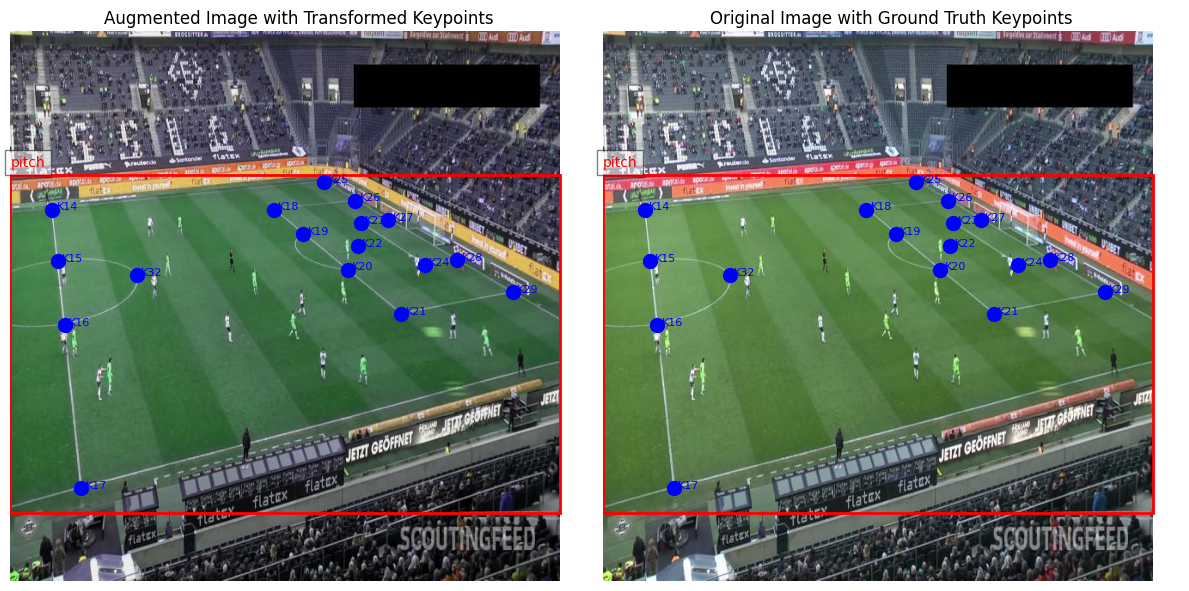

Original bbox in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: [[0.5, 0.540625, 1.0, 0.58125]]
Original keypoint 1 in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: (x=15.2381, y=194.3901037037037)
Original keypoint 2 in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: (x=15.2381, y=270.14945185185184)
Original keypoint 3 in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: (x=15.938366666666667, y=310.5223703703703)
Original keypoint 4 in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: (x=15.2381, y=384.2803555555555)
Original keypoint 5 in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: (x=12.6984, y=420.68420740740737)
Original keypoint 6 in /content/train/images/0bfacc_1_2_png.rf.a61e559751e4f7ea8bb51e43e4113b6b.jpg: (x=12.6984, y=495.4596148148148)
Original keypoint 7 in /content/train/images/0bfacc_1_2_

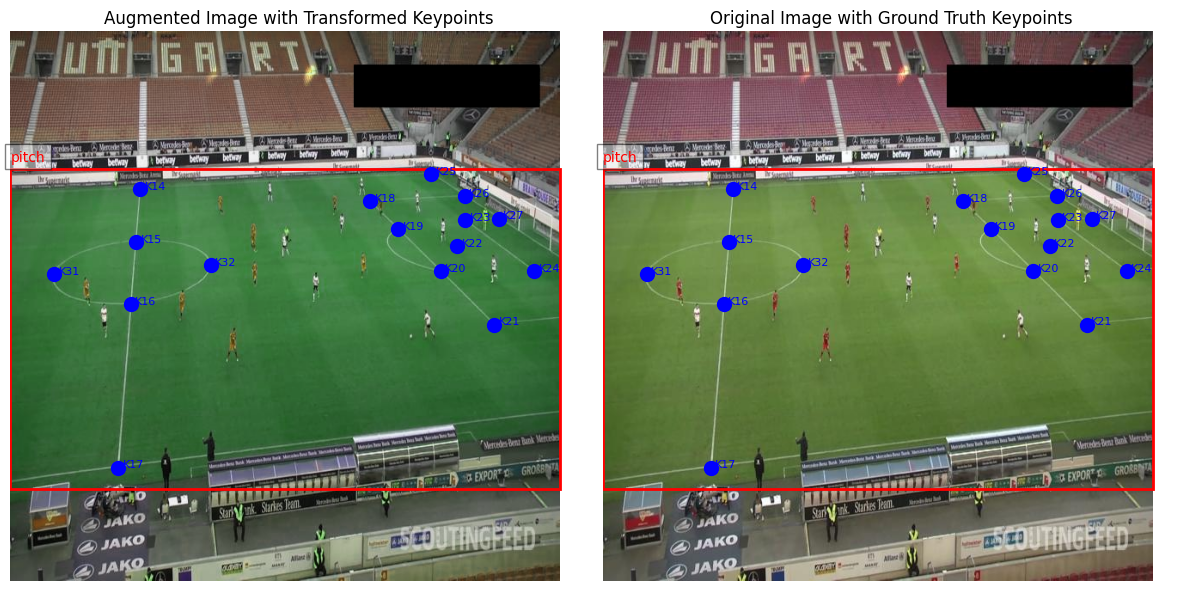

Original bbox in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: [[0.5, 0.64921875, 1.0, 0.53671875]]
Original keypoint 1 in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: (x=72.65209999999999, y=263.41973333333334)
Original keypoint 2 in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: (x=40.05546666666666, y=289.21119999999996)
Original keypoint 3 in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: (x=5.507199999999999, y=316.5672296296296)
Original keypoint 4 in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: (x=15.2381, y=450.7440592592592)
Original keypoint 5 in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: (x=12.6984, y=484.3629629629629)
Original keypoint 6 in /content/train/images/2e57b9_9_11_png.rf.e5e95f6857ae36a9a5f180bf585ea290.jpg: (x=12.6984, y=553.4180740740741)
Original keypoint 7 in /c

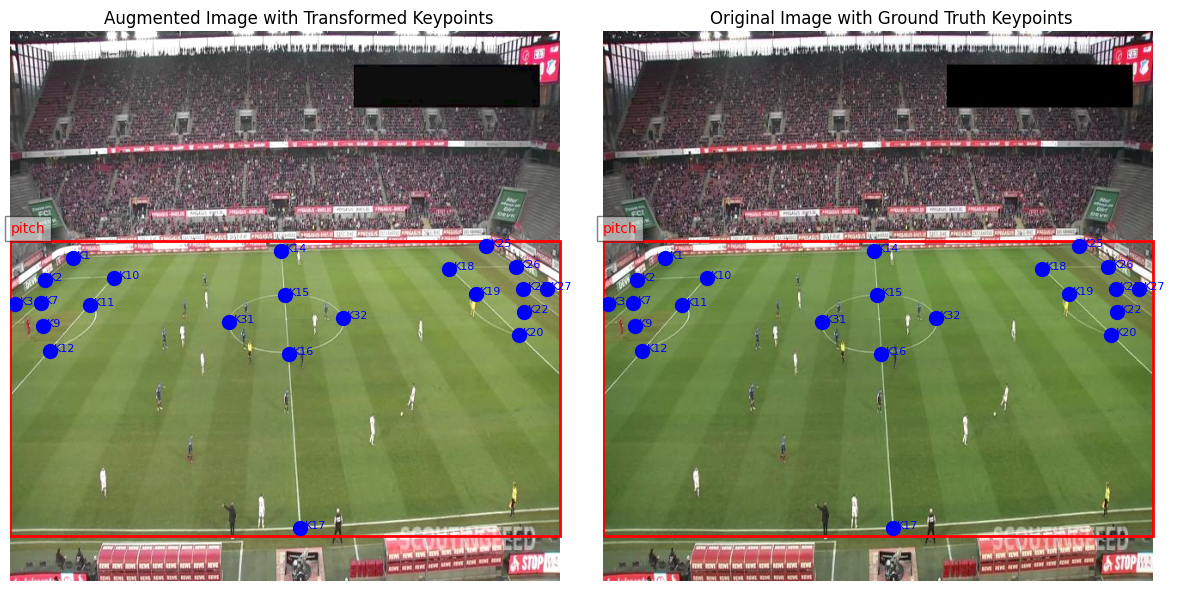

In [10]:
"""## Visualize Augmented Samples"""
import albumentations as A

augmentation_pipeline = A.Compose([
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=20, val_shift_limit=20, p=1.0),
    # A.Rotate(limit=30, p=1.0),  # Reduced rotation limit
    # A.Affine(scale=(0.95, 1.05), translate_percent=0.0, rotate=0.0, shear=0.0, p=1.0),  # Reduced scale range
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']), keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

if train_images:
    sample_images = random.sample(train_images, min(3, len(train_images)))
    for img_path in sample_images:
        img = np.array(PILImage.open(img_path))
        img_height, img_width = img.shape[:2]

        label_file = os.path.join(DATASET_DIR, 'train', 'labels', os.path.splitext(os.path.basename(img_path))[0] + '.txt')
        if not os.path.exists(label_file):
            print(f"Warning: Label file {label_file} not found, skipping.")
            continue

        bboxes = []
        keypoints = []
        visibilities = []
        class_labels = []
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {label_file}, skipping.")
                    continue
                center_x, center_y, box_width, box_height = map(float, parts[1:5])
                bboxes.append([center_x, center_y, box_width, box_height])
                kpts = [float(x) for x in parts[5:]]
                if len(kpts) != num_keypoints * 3:
                    print(f"Warning: Expected {num_keypoints * 3} keypoint values, got {len(kpts)} in {label_file}")
                    continue
                kpts_xy = [(kpts[i] * img_width, kpts[i+1] * img_height) for i in range(0, len(kpts), 3)]  # Convert to pixel coordinates
                kpts_vis = [kpts[i+2] for i in range(0, len(kpts), 3)]
                keypoints.extend(kpts_xy)
                visibilities.extend(kpts_vis)
                class_labels.append(class_id)

        # Log original bboxes and keypoints
        print(f"Original bbox in {img_path}: {bboxes}")
        for i, (kx, ky) in enumerate(keypoints):
            print(f"Original keypoint {i+1} in {img_path}: (x={kx}, y={ky})")

        # Apply augmentation
        augmented = augmentation_pipeline(
            image=img,
            bboxes=bboxes,
            keypoints=keypoints,
            class_labels=class_labels
        )
        aug_img = augmented['image']
        aug_bboxes = augmented['bboxes']
        aug_keypoints = augmented['keypoints']
        aug_class_labels = augmented['class_labels']

        if not aug_bboxes or not aug_keypoints:
            print(f"Warning: No valid bboxes or keypoints after augmentation for {img_path}, skipping.")
            continue

        aug_keypoints_with_vis = [(kp[0], kp[1], vis) for kp, vis in zip(aug_keypoints, visibilities[:len(aug_keypoints)])]

        # Create subplot for original and augmented images
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot augmented image (left)
        ax1.imshow(aug_img)
        aug_img_height, aug_img_width = aug_img.shape[:2]
        aug_keypoints_grouped = [aug_keypoints_with_vis[i:i+num_keypoints] for i in range(0, len(aug_keypoints_with_vis), num_keypoints)]

        for bbox, kpts, class_id in zip(aug_bboxes, aug_keypoints_grouped, aug_class_labels):
            center_x, center_y, box_width, box_height = bbox
            # Clip bbox coordinates
            center_x = min(max(center_x, 0), 1)
            center_y = min(max(center_y, 0), 1)
            box_width = min(max(box_width, 0), 1)
            box_height = min(max(box_height, 0), 1)
            xmin = (center_x - box_width / 2) * aug_img_width
            xmax = (center_x + box_width / 2) * aug_img_width
            ymin = (center_y - box_height / 2) * aug_img_height
            ymax = (center_y + box_height / 2) * aug_img_height
            # Ensure bbox stays within image
            xmin = min(max(xmin, 0), aug_img_width)
            xmax = min(max(xmax, 0), aug_img_width)
            ymin = min(max(ymin, 0), aug_img_height)
            ymax = min(max(ymax, 0), aug_img_height)

            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor=colors[int(class_id)], facecolor='none', linewidth=2)
            ax1.add_patch(rect)
            ax1.text(xmin, ymin - 10, class_names[int(class_id)], color=colors[int(class_id)], fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

            for kpt_idx, (kx, ky, vis) in enumerate(kpts):
                if vis >= 1:
                    # Clip keypoint coordinates
                    kx = min(max(kx, 0), aug_img_width)
                    ky = min(max(ky, 0), aug_img_height)
                    ax1.plot(kx, ky, 'o', color='blue', markersize=10)
                    ax1.text(kx + 5, ky, f'K{kpt_idx+1}', color='blue', fontsize=8)
                    # Log if clipping was applied
                    if kx <= 0 or kx >= aug_img_width or ky <= 0 or ky >= aug_img_height:
                        print(f"Augmented keypoint {kpt_idx+1} clipped in {img_path}: (x={kx}, y={ky}), image size: ({aug_img_width}, {aug_img_height})")

        ax1.set_title('Augmented Image with Transformed Keypoints')
        ax1.axis('off')

        # Plot original image (right)
        ax2.imshow(img)
        orig_keypoints_grouped = [keypoints[i:i+num_keypoints] for i in range(0, len(keypoints), num_keypoints)]
        orig_vis_grouped = [visibilities[i:i+num_keypoints] for i in range(0, len(visibilities), num_keypoints)]

        for bbox, kpts, vis, class_id in zip(bboxes, orig_keypoints_grouped, orig_vis_grouped, class_labels):
            center_x, center_y, box_width, box_height = bbox
            # Clip bbox coordinates for safety
            center_x = min(max(center_x, 0), 1)
            center_y = min(max(center_y, 0), 1)
            box_width = min(max(box_width, 0), 1)
            box_height = min(max(box_height, 0), 1)
            xmin = (center_x - box_width / 2) * img_width
            xmax = (center_x + box_width / 2) * img_width
            ymin = (center_y - box_height / 2) * img_height
            ymax = (center_y + box_height / 2) * img_height
            # Ensure bbox stays within image
            xmin = min(max(xmin, 0), img_width)
            xmax = min(max(xmax, 0), img_width)
            ymin = min(max(ymin, 0), img_height)
            ymax = min(max(ymax, 0), img_height)

            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor=colors[int(class_id)], facecolor='none', linewidth=2)
            ax2.add_patch(rect)
            ax2.text(xmin, ymin - 10, class_names[int(class_id)], color=colors[int(class_id)], fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

            for kpt_idx, (kx, ky), vis_val in zip(range(len(kpts)), kpts, vis):
                if vis_val >= 1:
                    # Keypoints are already in pixel coordinates
                    kx = min(max(kx, 0), img_width)
                    ky = min(max(ky, 0), img_height)
                    ax2.plot(kx, ky, 'o', color='blue', markersize=10)
                    ax2.text(kx + 5, ky, f'K{kpt_idx+1}', color='blue', fontsize=8)
                    # Log if clipping was applied (unlikely for original)
                    if kx <= 0 or kx >= img_width or ky <= 0 or ky >= img_height:
                        print(f"Original keypoint {kpt_idx+1} clipped in {img_path}: (x={kx}, y={ky}), image size: ({img_width}, {img_height})")

        ax2.set_title('Original Image with Ground Truth Keypoints')
        ax2.axis('off')

        # Log augmented bboxes and keypoints
        print(f"Augmented bbox in {img_path}: {aug_bboxes}")
        for i, (kx, ky, vis) in enumerate(aug_keypoints_with_vis):
            print(f"Augmented keypoint {i+1} in {img_path}: (x={kx}, y={ky}, vis={vis})")

        plt.tight_layout()
        plt.savefig(os.path.join(DATASET_DIR, f'augmented_vs_original_keypoint_sample_{os.path.basename(img_path)}.png'))
        plt.show()
else:
    print("No training images found.")


In [11]:
"""## Train YOLOv11 Pose Model"""
from ultralytics import YOLO
import shutil

model = YOLO('yolo11x-pose.pt')

model.train(
    data=dataset_yaml_path,
    task='pose',
    mode='train',
    epochs=100,
    batch=4,
    imgsz=640,
    hsv_h=0.5,        # Hue augmentation
    # crop_fraction=1.0,  # No cropping
    degrees=0.1,         # Rotation
    translate=0.0,      # No translation
    # scale=0.5,          # Scaling
    mosaic=0.0,         # Disabled as requested
    plots=True,
    name='yolo11x_pitch_keypoint_detector',
    device=0
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 113M/113M [00:02<00:00, 41.2MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.1, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.5, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x-pose.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=yolo11x_pitch_keypoint_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

100%|██████████| 755k/755k [00:00<00:00, 121MB/s]

Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[32, 3]
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              


  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  8                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  9                  -1  1   1476864  ultralytics.nn.modules.block.SPPF            [768, 768, 5]                 
 10                  -1  2   3264768  ultralytics.nn.modules.block.C2PSA           [768, 768, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   5612544  ultralytics.nn.modules.block.C3k2            [1536, 768, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

100%|██████████| 5.35M/5.35M [00:00<00:00, 196MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1250.4±690.8 MB/s, size: 66.2 KB)


train: Scanning /content/train/labels... 255 images, 0 backgrounds, 0 corrupt: 100%|██████████| 255/255 [00:00<00:00, 1140.13it/s]

train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 482.6±182.9 MB/s, size: 56.2 KB)


val: Scanning /content/valid/labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<00:00, 634.02it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/pose/yolo11x_pitch_keypoint_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 173 weight(decay=0.0), 183 weight(decay=0.0005), 182 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/yolo11x_pitch_keypoint_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.74G      1.292      11.69     0.7001      1.445      2.024          3        640: 100%|██████████| 64/64 [00:24<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all         34         34     0.0175      0.824     0.0185    0.00559          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.07G     0.9709      11.34     0.6144     0.7271      1.776          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all         34         34     0.0564      0.882     0.0585     0.0237          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.39G      1.293      11.11     0.6304     0.9428      2.154          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all         34         34    0.00141      0.265   0.000862   0.000494          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.72G      1.264      10.66     0.6135     0.9724      2.147          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all         34         34      0.167     0.0294       0.09      0.009          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.07G      1.104      10.44     0.5927     0.8123      1.992          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         34         34      0.711      0.588      0.607      0.459          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100       6.4G     0.9323      10.08     0.5978      0.857      1.803          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all         34         34          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.73G     0.8198      9.785     0.5979     0.6501      1.685          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all         34         34      0.827      0.529      0.629      0.511          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.05G     0.8019      9.792     0.5921     0.5704      1.665          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34      0.368      0.647      0.488      0.234          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100       7.4G     0.8845      9.701     0.5971     0.5726      1.711          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]

                   all         34         34      0.398      0.265      0.323      0.203          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.76G     0.7416      9.794     0.5867     0.5028      1.588          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]

                   all         34         34      0.955      0.676      0.769      0.637     0.0595     0.0294    0.00583   0.000583



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.06G     0.8492      9.556     0.5944     0.4926      1.703          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all         34         34      0.531      0.618       0.59      0.376    0.00272     0.0294     0.0014    0.00014



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.38G     0.8461      9.341     0.5868     0.5282      1.648          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all         34         34      0.772      0.912      0.894      0.787     0.0496     0.0588    0.00808   0.000808



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.71G     0.6989      9.192     0.5899     0.4657      1.513          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.969          1      0.995      0.898     0.0456     0.0294    0.00894   0.000894



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.04G     0.7316      9.123     0.5897     0.4774       1.55          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.959          1      0.993      0.834     0.0615     0.0294     0.0125    0.00198



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.39G     0.7255      9.037     0.5911     0.4542      1.541          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all         34         34      0.942      0.959      0.989      0.858     0.0311     0.0294    0.00591    0.00118



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.74G     0.6872      8.768     0.5741     0.4513      1.497          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34          1      0.995      0.995      0.894     0.0605     0.0588    0.00912    0.00131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.04G     0.7312      8.611     0.5648     0.4599      1.555          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.992          1      0.995      0.852          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.37G     0.6677      8.421      0.562     0.4011      1.486          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all         34         34      0.997          1      0.995      0.913     0.0907     0.0882     0.0584    0.00584



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.86G     0.6263       8.31      0.559     0.3994      1.433          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         34         34      0.943          1      0.992      0.821          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.06G     0.6304      8.286     0.5408     0.4022      1.425          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         34         34      0.991          1      0.995      0.849     0.0889     0.0882     0.0268    0.00268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.37G     0.6071      7.977     0.5296      0.397      1.402          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.997          1      0.995      0.916      0.125     0.0882     0.0485     0.0137



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.71G     0.5496      8.116     0.5132     0.3467      1.359          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         34         34          1      0.999      0.995      0.907      0.118     0.0882     0.0311    0.00311



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.04G     0.6348      8.069     0.5015     0.4043      1.412          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34      0.992          1      0.995      0.918      0.273      0.147     0.0997     0.0227



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.37G     0.6178      7.918     0.4958     0.3626      1.417          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all         34         34      0.994          1      0.995      0.899     0.0392     0.0588     0.0215    0.00435



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.7G     0.5934      7.802      0.458     0.3726      1.383          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.994          1      0.995      0.921          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.03G     0.5977      7.778     0.4539      0.392      1.408          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         34         34      0.999          1      0.995      0.891     0.0534     0.0294    0.00735    0.00147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.37G     0.5733      7.715     0.4397     0.3522      1.358          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all         34         34      0.992          1      0.995       0.91      0.156      0.147     0.0829     0.0125



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.87G     0.5351      7.363     0.4161     0.3467      1.337          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         34         34       0.97          1      0.994      0.919     0.0933     0.0882     0.0426    0.00481



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.04G     0.5361       6.74     0.3911     0.3559      1.349          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all         34         34      0.997          1      0.995      0.894      0.161      0.176     0.0872     0.0223



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.39G       0.47      6.817     0.3707     0.3229       1.29          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all         34         34          1      0.991      0.995      0.916      0.165      0.206      0.089     0.0192



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.71G     0.5146      6.729     0.3576     0.3173      1.306          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all         34         34      0.969          1      0.994      0.884      0.163      0.218     0.0872     0.0151



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.04G     0.5219      6.784     0.3281     0.3377      1.319          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all         34         34      0.968          1      0.994      0.854      0.246      0.235      0.126     0.0222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.37G     0.5227      6.553     0.3229     0.3557      1.321          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.965          1      0.994      0.932      0.287      0.294      0.163     0.0427



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.7G      0.479      6.317     0.3117     0.3343      1.294          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         34         34      0.949          1      0.994      0.911      0.422      0.441      0.271     0.0467



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.03G     0.4706       5.88     0.2915     0.3109      1.247          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         34         34      0.996          1      0.995       0.89      0.409      0.412       0.27      0.065



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.37G      0.509      6.151     0.3039     0.3273      1.279          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         34         34      0.996          1      0.995      0.924      0.322      0.324      0.199     0.0419



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.87G     0.4704      5.894     0.2766     0.3184       1.25          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34      0.971          1      0.994      0.914      0.342      0.353      0.212     0.0535



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.06G     0.4774      5.512     0.2665     0.3046      1.259          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.975          1      0.995      0.918      0.467      0.471      0.369     0.0662



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.39G     0.4909      5.569     0.2469     0.3272      1.279          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         34         34      0.996          1      0.995      0.908       0.44      0.441      0.309     0.0739



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.71G     0.4511      5.012      0.248     0.2992      1.231          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all         34         34      0.995          1      0.995      0.921      0.409      0.412      0.258      0.065



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.04G     0.4578      5.374      0.258     0.3114      1.231          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all         34         34      0.989          1      0.995      0.912      0.553      0.559      0.394     0.0958



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.37G     0.4182      5.066     0.2379     0.2722      1.215          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         34         34       0.97          1      0.994      0.926      0.513      0.529        0.4     0.0738



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100       6.7G     0.4087      5.172     0.2406      0.283      1.189          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         34         34      0.969          1      0.994      0.925       0.36      0.353      0.229     0.0765



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.04G     0.4501      4.892     0.2303     0.2895      1.251          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         34         34      0.985          1      0.995      0.912      0.723      0.735      0.598      0.141



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.37G     0.4138      4.757     0.2292     0.2697      1.206          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all         34         34      0.995          1      0.995       0.93      0.644      0.647      0.481      0.137



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.88G     0.4326      4.682     0.2251      0.282      1.219          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all         34         34      0.997          1      0.995      0.922      0.645      0.647      0.518      0.182



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.06G     0.4212      4.607     0.2258     0.2752      1.187          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34      0.994          1      0.995      0.929      0.585      0.588      0.414      0.138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.38G     0.3867      4.827     0.2227     0.2671       1.17          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all         34         34       0.99          1      0.995       0.91      0.583      0.588      0.465      0.127



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.71G     0.4028      4.784      0.226     0.2656      1.176          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.997          1      0.995      0.911      0.411      0.412      0.271     0.0585



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.04G     0.3937       4.74     0.2234     0.2644      1.159          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all         34         34      0.996          1      0.995      0.956      0.644      0.647      0.515      0.135



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.39G     0.4155      4.662     0.2182     0.2689      1.196          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         34         34      0.998          1      0.995       0.93      0.617      0.618        0.5      0.167



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100       6.7G     0.3726      4.069     0.2098     0.2474      1.152          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all         34         34      0.986          1      0.995      0.927      0.812      0.824      0.773      0.238



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.04G     0.4304      4.038      0.214     0.2714      1.178          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all         34         34      0.997          1      0.995      0.931      0.762      0.765      0.644       0.19



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.37G     0.3924      3.824     0.2085     0.2694      1.153          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all         34         34      0.998          1      0.995      0.923      0.763      0.765      0.673      0.243



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.89G     0.4288      3.762       0.21     0.2772      1.159          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34      0.993          1      0.995      0.931      0.876      0.882      0.858       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.07G     0.3545      3.603     0.2037     0.2389      1.153          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

                   all         34         34      0.992          1      0.995      0.942      0.875      0.882       0.82      0.258



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.38G     0.4109      3.782     0.2006     0.2782      1.148          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all         34         34      0.997          1      0.995       0.92      0.763      0.765      0.669      0.254



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.71G     0.3871        3.7     0.2052     0.2721      1.159          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all         34         34      0.985          1      0.995      0.933      0.868      0.882      0.827      0.259



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.04G      0.438      3.701     0.2034     0.2893      1.176          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]

                   all         34         34      0.994          1      0.995      0.867      0.788      0.794      0.719       0.27



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.37G     0.3712      3.386      0.198     0.2565       1.14          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all         34         34      0.998          1      0.995      0.952      0.821      0.824      0.725      0.294



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.72G     0.3979       3.65     0.2056     0.2705      1.163          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.996          1      0.995      0.931      0.761      0.765      0.646      0.246



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.04G     0.3568      3.387     0.1999     0.2548      1.123          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         34         34      0.982          1      0.995      0.914      0.924      0.941      0.908      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.37G     0.3882      3.346      0.197      0.264      1.157          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.994          1      0.995      0.924      0.848      0.853      0.786      0.299



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.88G     0.3693      3.341     0.1859     0.2491      1.144          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all         34         34      0.995          1      0.995      0.931      0.878      0.882      0.857      0.339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.08G     0.3434      3.185     0.1976     0.2468      1.121          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.998          1      0.995      0.929       0.91      0.912      0.873      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.39G     0.3715      3.298     0.1903     0.2436      1.132          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         34         34      0.998          1      0.995      0.895      0.822      0.824      0.742      0.324



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.71G     0.3607      2.958     0.1951     0.2492      1.121          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all         34         34          1          1      0.995      0.891      0.882      0.882      0.844      0.381



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.04G     0.3401      3.031     0.1891     0.2468      1.111          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         34         34      0.999          1      0.995      0.885       0.91      0.912      0.881      0.317



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.37G     0.3483      3.019     0.1916     0.2452      1.101          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all         34         34      0.998          1      0.995      0.849      0.852      0.853       0.78      0.318



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.74G      0.316      3.228     0.1891     0.2254      1.106          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.998          1      0.995      0.906      0.881      0.882      0.825       0.32



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.04G     0.3206      3.107     0.1872     0.2391      1.104          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]

                   all         34         34      0.998          1      0.995      0.881       0.88      0.882      0.834      0.357



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.37G     0.3135      2.764     0.1827     0.2286      1.114          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.997          1      0.995      0.923      0.938      0.941      0.915      0.399



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.88G     0.3316      2.836     0.1876     0.2306      1.095          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         34         34      0.998          1      0.995      0.901       0.91      0.912      0.869      0.389



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.06G     0.3227      2.806     0.1913      0.237      1.075          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.998          1      0.995      0.865      0.852      0.853       0.79      0.342



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.39G     0.3386      2.663     0.1868     0.2401      1.086          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all         34         34      0.998          1      0.995      0.936       0.91      0.912      0.887      0.429



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.71G     0.3097      2.732     0.1812     0.2207      1.078          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all         34         34      0.998          1      0.995      0.915      0.968      0.971      0.957      0.374



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.04G     0.3249      2.641     0.1821     0.2289      1.085          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all         34         34      0.998          1      0.995      0.922      0.939      0.941      0.915      0.413



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.39G     0.3149       2.71     0.1753     0.2263       1.08          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all         34         34      0.998          1      0.995      0.893       0.91      0.912      0.865      0.412



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.72G     0.3056      2.411     0.1819     0.2236       1.06          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.996          1      0.995      0.937      0.937      0.941      0.909      0.416



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.04G     0.3327      2.508     0.1839     0.2289      1.086          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all         34         34      0.997          1      0.995      0.912      0.938      0.941      0.916        0.5



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.37G     0.2882      2.188     0.1751     0.2119      1.065          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all         34         34      0.998          1      0.995      0.887      0.969      0.971      0.959      0.498



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.88G     0.3156      2.106     0.1777     0.2252      1.061          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all         34         34      0.998          1      0.995      0.903      0.939      0.941      0.912       0.48



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.05G     0.2934      2.235     0.1813     0.2183      1.049          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         34         34      0.998          1      0.995      0.906      0.969      0.971      0.956      0.553



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.39G     0.2931      2.159     0.1714     0.2216      1.056          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.998          1      0.995      0.925      0.968      0.971       0.96      0.524



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.71G     0.2752      2.234     0.1794     0.2118      1.058          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         34         34      0.997          1      0.995      0.926      0.967      0.971      0.959      0.512



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.04G     0.3143       2.16     0.1736     0.2217      1.062          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.34it/s]

                   all         34         34      0.997          1      0.995      0.935      0.967      0.971      0.972      0.563



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.37G     0.2945      2.136     0.1792     0.2129      1.069          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.996          1      0.995      0.929      0.996          1      0.995      0.555



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.72G      0.276      2.051     0.1711     0.2053      1.053          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         34         34      0.997          1      0.995      0.889      0.968      0.971      0.955      0.545



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.04G     0.2885      2.154     0.1742     0.2107      1.063          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all         34         34      0.998          1      0.995      0.933       0.94      0.941      0.911      0.555



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.37G     0.2771      2.041     0.1795     0.2078      1.028          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.998          1      0.995      0.898      0.939      0.941       0.94      0.475


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.84G     0.2698      2.025     0.1672     0.2006      1.055          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all         34         34      0.997          1      0.995      0.914      0.968      0.971      0.957      0.553



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.06G     0.2825      2.039     0.1695     0.2084      1.038          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all         34         34      0.998          1      0.995      0.922      0.998          1      0.995      0.486



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.39G     0.2656      1.949     0.1722     0.1938       1.05          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all         34         34      0.998          1      0.995      0.915      0.968      0.971      0.955      0.528



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.71G     0.2648       1.96     0.1716     0.1973      1.052          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]

                   all         34         34      0.998          1      0.995      0.923      0.998          1      0.995      0.524



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.04G     0.2912      1.861     0.1734     0.2082      1.059          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         34         34      0.997          1      0.995      0.929      0.997          1      0.995      0.595



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.37G     0.2698      1.908     0.1711     0.2064      1.042          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]

                   all         34         34      0.998          1      0.995      0.898      0.998          1      0.995      0.582



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100       6.7G     0.2672      1.722     0.1639     0.2018      1.031          3        640: 100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all         34         34      0.998          1      0.995      0.909      0.998          1      0.995      0.603



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.04G     0.2659      1.633     0.1683     0.2027      1.018          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         34         34      0.998          1      0.995      0.906      0.969      0.971      0.956      0.594



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.37G     0.2592       1.67     0.1633     0.1986      1.021          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all         34         34      0.998          1      0.995      0.912      0.969      0.971      0.955      0.608



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.89G     0.2483      1.794     0.1753     0.1897      1.036          3        640: 100%|██████████| 64/64 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all         34         34      0.998          1      0.995      0.908      0.969      0.971      0.955      0.617



100 epochs completed in 0.738 hours.
Optimizer stripped from runs/pose/yolo11x_pitch_keypoint_detector/weights/last.pt, 118.3MB
Optimizer stripped from runs/pose/yolo11x_pitch_keypoint_detector/weights/best.pt, 118.3MB

Validating runs/pose/yolo11x_pitch_keypoint_detector/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x-pose summary (fused): 199 layers, 58,764,403 parameters, 0 gradients, 202.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]


                   all         34         34      0.997          1      0.995      0.929      0.997          1      0.995      0.595
Speed: 0.6ms preprocess, 35.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/pose/yolo11x_pitch_keypoint_detector


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797518304d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

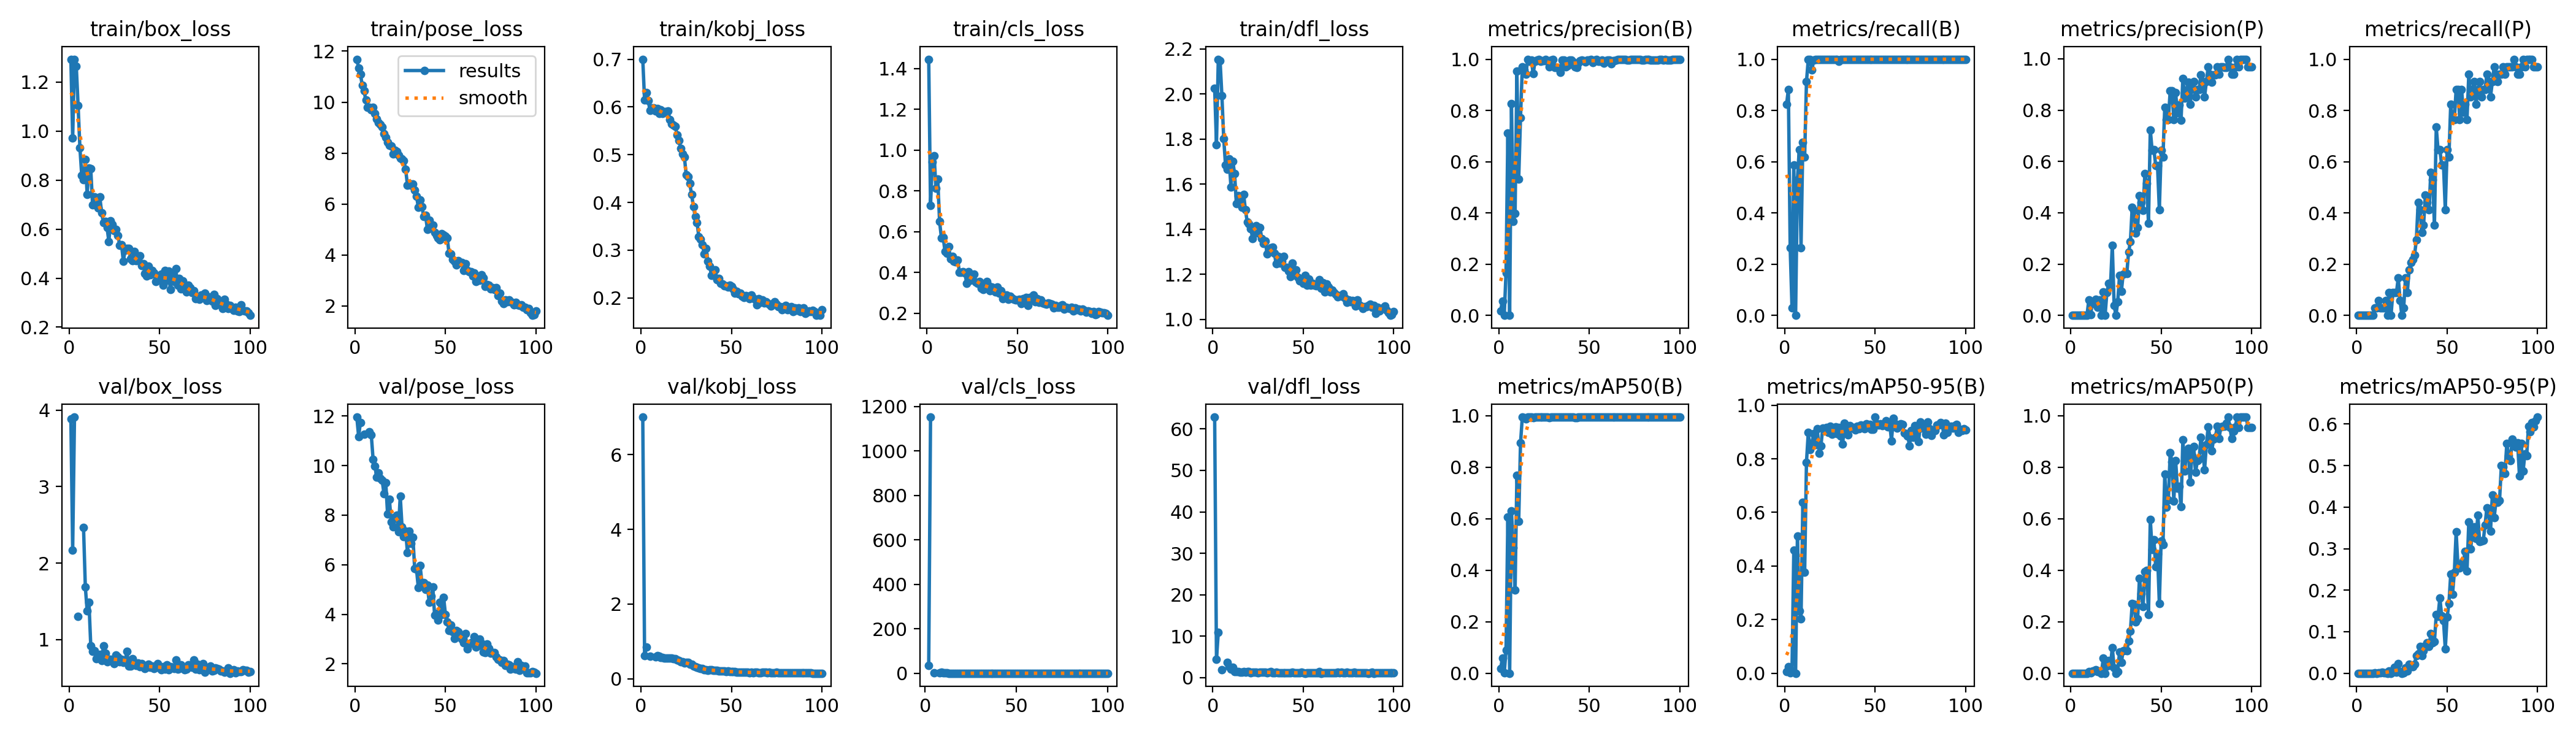

In [12]:
"""## Visualize Training Results"""
from IPython.display import Image

run_dir = os.path.join(HOME, 'runs/pose/yolo11x_pitch_keypoint_detector')
results_path = os.path.join(run_dir, 'results.png')
if os.path.exists(results_path):
    display(Image(filename=results_path, width=600))
else:
    print(f"Results plot not found: {results_path}")



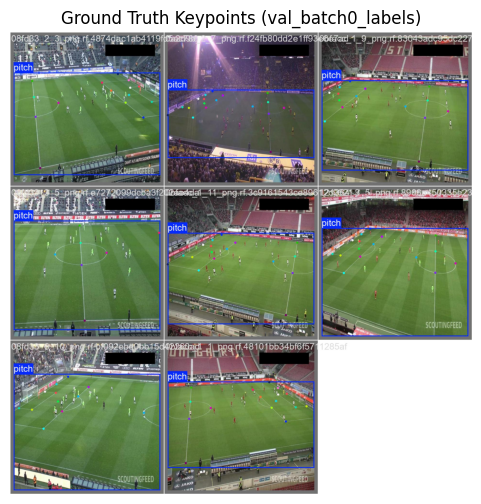

In [13]:
ground_truth_path = os.path.join(run_dir, 'val_batch0_labels.jpg')
predicted_path = os.path.join(run_dir, 'val_batch0_pred.jpg')

if os.path.exists(ground_truth_path):
    ground_truth_img = plt.imread(ground_truth_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(ground_truth_img)
    plt.title('Ground Truth Keypoints (val_batch0_labels)')
    plt.axis('off')
    plt.savefig(os.path.join(run_dir, 'ground_truth_keypoints.png'))
    plt.show()
else:
    print(f"Ground truth image not found: {ground_truth_path}")



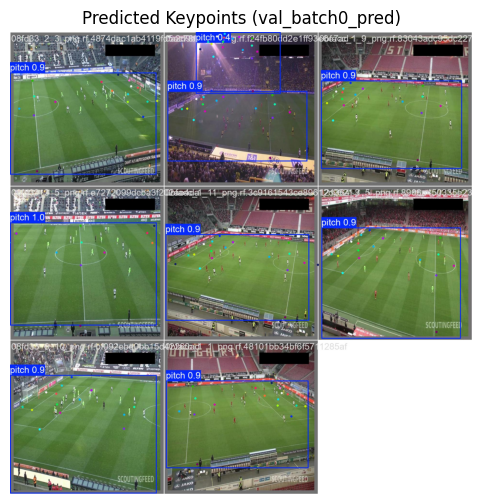

In [14]:
if os.path.exists(predicted_path):
    predicted_img = plt.imread(predicted_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(predicted_img)
    plt.title('Predicted Keypoints (val_batch0_pred)')
    plt.axis('off')
    plt.savefig(os.path.join(run_dir, 'predicted_keypoints.png'))
    plt.show()
else:
    print(f"Predicted image not found: {predicted_path}")


In [15]:
"""## Validate the Model"""
model.val(data=dataset_yaml_path, imgsz=640)


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x-pose summary (fused): 199 layers, 58,764,403 parameters, 0 gradients, 202.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1507.6±189.0 MB/s, size: 62.4 KB)


val: Scanning /content/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]


                   all         34         34      0.997          1      0.995      0.929      0.997          1      0.995      0.595
Speed: 2.1ms preprocess, 72.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/pose/yolo11x_pitch_keypoint_detector2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79751893d050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

Running inference on: /content/test/images/121364_3_1_png.rf.ddde85f0cbd1fbf16aa1336bbb8c3dfc.jpg

image 1/1 /content/test/images/121364_3_1_png.rf.ddde85f0cbd1fbf16aa1336bbb8c3dfc.jpg: 640x640 1 pitch, 82.2ms
Speed: 10.1ms preprocess, 82.2ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


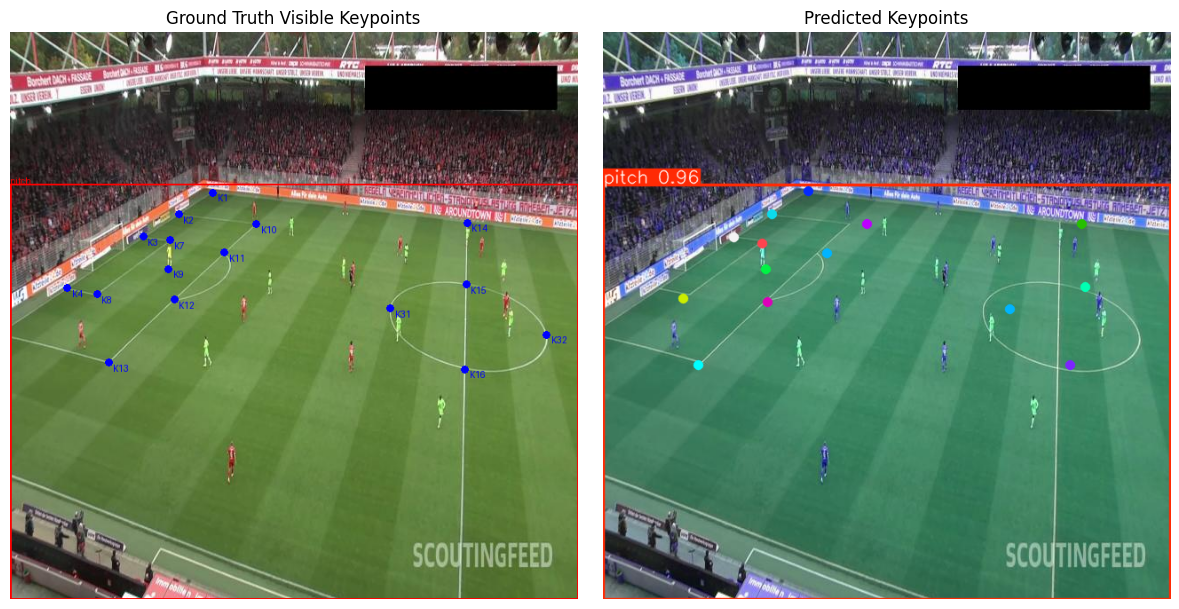

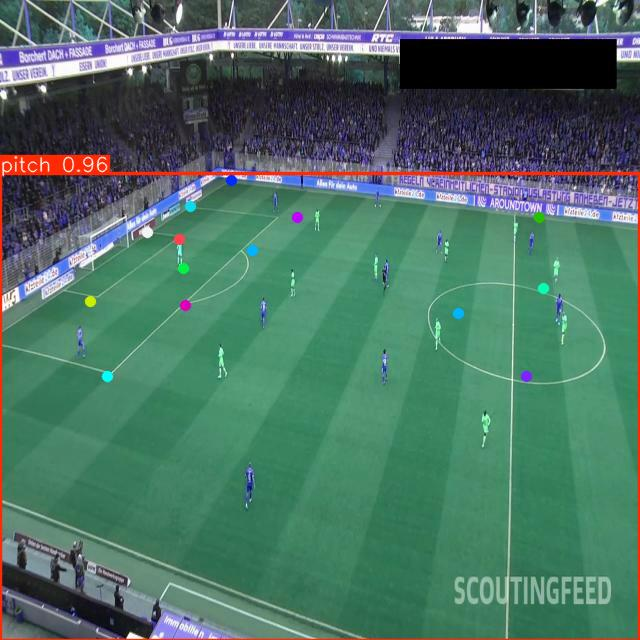

In [16]:

"""## Inference on Test Images"""
from PIL import ImageDraw

test_images = glob.glob(os.path.join(DATASET_DIR, 'test', 'images', '*.jpg')) + glob.glob(os.path.join(DATASET_DIR, 'test', 'images', '*.png'))

if test_images:
    test_image = random.choice(test_images)
    print("Running inference on:", test_image)

    img = PILImage.open(test_image)
    img_width, img_height = img.size

    label_file = os.path.join(DATASET_DIR, 'test', 'labels', os.path.splitext(os.path.basename(test_image))[0] + '.txt')
    ground_truth_img = img.copy()
    draw = ImageDraw.Draw(ground_truth_img)

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {label_file}, skipping.")
                    continue
                center_x, center_y, box_width, box_height = map(float, parts[1:5])
                xmin = (center_x - box_width / 2) * img_width
                xmax = (center_x + box_width / 2) * img_width
                ymin = (center_y - box_height / 2) * img_height
                ymax = (center_y + box_height / 2) * img_height
                draw.rectangle((xmin, ymin, xmax, ymax), outline='red', width=2)
                draw.text((xmin, ymin - 10), class_names[class_id], fill='red')

                kpts = [float(x) for x in parts[5:]]
                if len(kpts) != num_keypoints * 3:
                    print(f"Warning: Expected {num_keypoints * 3} keypoint values, got {len(kpts)} in {label_file}")
                    continue
                kpts = [(kpts[i], kpts[i+1], kpts[i+2]) for i in range(0, len(kpts), 3)]
                for kpt_idx, (kx, ky, vis) in enumerate(kpts):
                    if vis >= 1:
                        px = kx * img_width
                        py = ky * img_height
                        if 0 <= px <= img_width and 0 <= py <= img_height:
                            draw.ellipse((px-4, py-4, px+4, py+4), fill='blue')
                            draw.text((px + 5, py), f'K{kpt_idx+1}', fill='blue')
                        else:
                            print(f"Test keypoint {kpt_idx+1} out of bounds in {test_image}: (x={px}, y={py})")

    results = model.predict(test_image, imgsz=640, conf=0.5)
    predicted_img = results[0].plot()

    ground_truth_np = np.array(ground_truth_img)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(ground_truth_np)
    ax2.imshow(predicted_img)
    ax1.set_title('Ground Truth Visible Keypoints')
    ax2.set_title('Predicted Keypoints')
    ax1.axis('off')
    ax2.axis('off')
    plt.tight_layout()

    output_path = os.path.join(run_dir, 'test_inference_comparison.jpg')
    plt.savefig(output_path)
    plt.show()

    predicted_output_path = os.path.join(run_dir, 'test_inference.jpg')
    PILImage.fromarray(predicted_img).save(predicted_output_path)
    display(Image(filename=predicted_output_path, width=600))
else:
    print("No test images found.")


In [17]:
model.save("best_keypoiny_model.pt")

In [18]:
from google.colab import files
files.download('best_keypoiny_model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
!cp ./best_keypoiny_model.pt /content/drive/MyDrive/best_keypoiny_model.pt

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
